### From the dataset predict the optimum number of clusters and represent it visually

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# 1. Dataset introduction

In [4]:
iris = pd.read_csv('Iris.csv')
iris_data = iris.copy()
iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


# 2. Dataset preparation

I have dropped two columns from dataset

In [5]:
iris_data = iris_data.drop(['Id', 'Species'], axis=1)
iris_data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


# 3. Average silhouette method for prediction thr optimal number of clusters

I have chosen the average silhouette method for prediction the optimal number of clusters. It computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k

In [6]:
n = 10 #different number of clusters
bad_k_values = {} #implementation the dictionary with number of k_values < 0
for i in range(2, n+1):
    bad_k_values[i] = 0
for i in range(2, n+1):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 300,
                    n_init = 10,
                    random_state = 10) #kmeans model for i clusters
    clusters_labels = kmeans.fit_predict(iris_data) # prediction of clusters
    for sil_sc in silhouette_samples(iris_data, clusters_labels): # k values
        if sil_sc < 0:
            if i not in bad_k_values:
                bad_k_values[i] = 1
            else:
                bad_k_values[i] += 1
#so, we have dictionary with number of k_values < 0, according to number of clusters

I have constructed the plot with number of clusters and number of k_values < 0

Text(0, 0.5, 'Negative values')

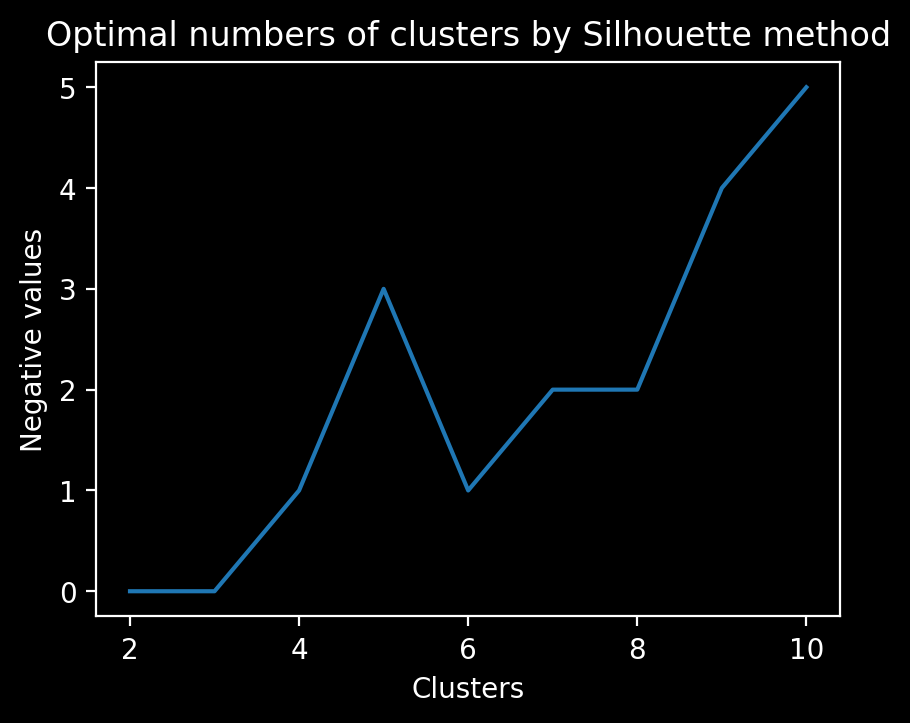

In [7]:
plt.plot(bad_k_values.keys(), bad_k_values.values())
plt.title('Optimal numbers of clusters by Silhouette method')
plt.xlabel('Clusters')
plt.ylabel('Negative values')

I saw that the plot has 0 negative values for 2 and 3 clusters. So, the optimal number of clusters by Silhoeutte method is 3

# 4. KMeans model construction

In [8]:
kmeans = KMeans(n_clusters = 3,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0)
iris_data['cluster'] = kmeans.fit_predict(iris_data)

Let's plot the points of the dataset with centroids of clusters

In [9]:
centroids = kmeans.cluster_centers_ #centroids prediction
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

iris_data['cen_x'] = iris_data['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris_data['cen_y'] = iris_data['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]}) #addition the centroids points to the dataframe

colors = ['red', 'blue', 'green']
iris_data['color'] = iris_data['cluster'].map({0:colors[0], 1:colors[1], 2:colors[2]}) #definition map colors

Text(0, 0.5, 'SepalWidthCm')

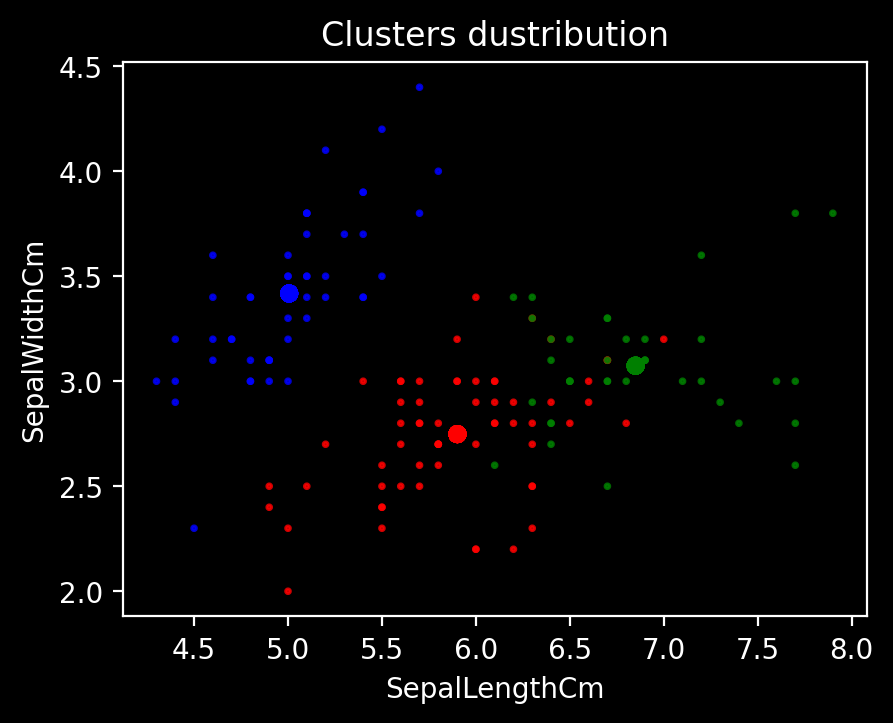

In [10]:
plt.scatter(iris_data['SepalLengthCm'], iris_data['SepalWidthCm'], c=iris_data['color'], alpha=0.8, s=3)
plt.scatter(iris_data['cen_x'], iris_data['cen_y'], c=iris_data['color'], alpha=0.8, s=30)
plt.title('Clusters dustribution')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')